Data Science supervised machine learning

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yaml

In [82]:
with open('config.yaml','r') as conf_file:
    config = yaml.load(conf_file, Loader=yaml.SafeLoader)

data = pd.read_csv(config["housing_data"])

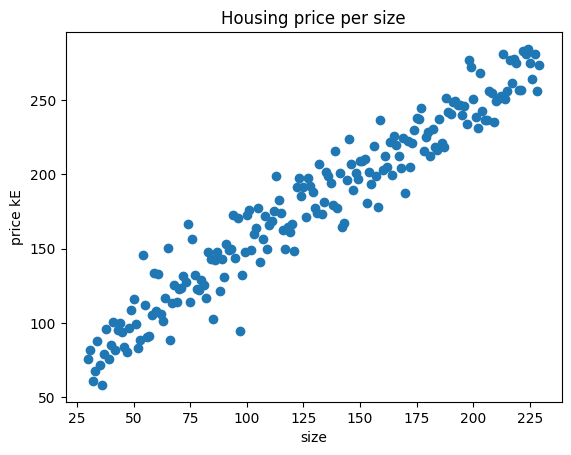

In [83]:
plt.scatter(x=data["size"],y=data["price"])
plt.title("Housing price per size")
plt.xlabel("size")
plt.ylabel("price kE")
plt.show()

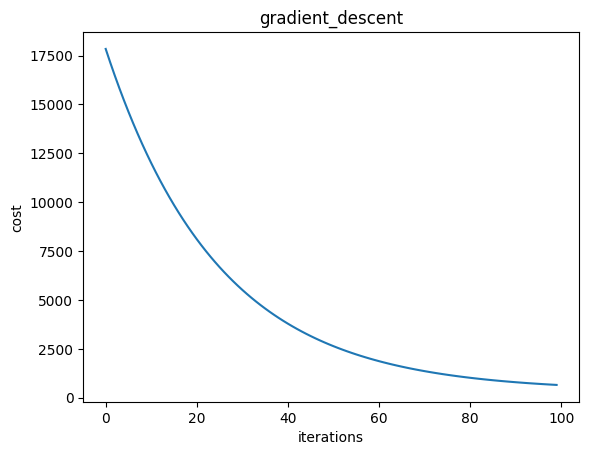

In [86]:
def compute_cost(X, y, theta):
    h =  X.dot(theta)
    loss = h - y
    return 1/(2 * X.shape[0]) * sum((loss**2)), loss


def gradient_descent(X,y,theta,alpha,num_iters):
    ones = np.ones((X.shape[0],1))
    X = np.concatenate((ones, X), axis=1)
    costs = []
    for _ in range(num_iters):
        cost, loss = compute_cost(X,y,theta)
        costs.append(cost)
        gradient = np.dot(X.T,loss)/ X.shape[0]
        theta = theta - alpha * gradient.T
    return costs, theta

X = data["size"]
X = X.values.reshape(-1, 1)
y = data["price"]

costs, theta = gradient_descent(X,y,[0,0],1e-6,100)

plt.plot(costs)
plt.xlabel('iterations')
plt.ylabel('cost')
plt.title("gradient_descent")
plt.show()

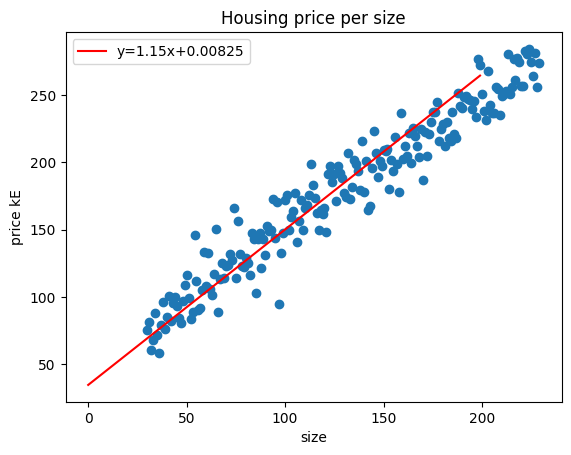

In [87]:


y_pred = [sum(theta * s) for s in data["size"]]

plt.scatter(x=data["size"],y=data["price"])
plt.plot(y_pred, color='red', label=f'y={theta[1]:.003}x+{theta[0]:.003}')
plt.title("Housing price per size")
plt.xlabel("size")
plt.ylabel("price kE")
plt.legend()
plt.show()
